In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [107]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
df.shape

(768, 9)

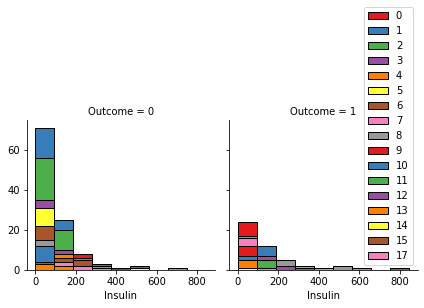

In [109]:
import seaborn as sns

bins = np.linspace(df.Insulin.min(), df.Insulin.max(), 10)
g = sns.FacetGrid(df, col="Outcome", hue="Pregnancies", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Insulin', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

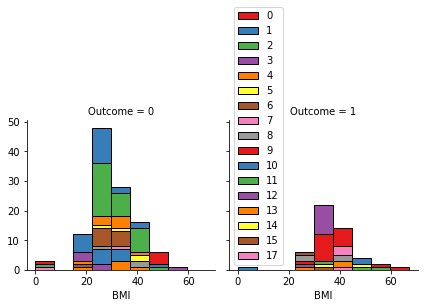

In [110]:
bins = np.linspace(df.BMI.min(), df.BMI.max(), 10)
g = sns.FacetGrid(df, col="Outcome", hue="Pregnancies", palette="Set1", col_wrap=2)
g.map(plt.hist, 'BMI', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

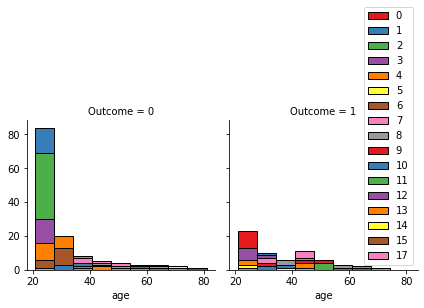

In [111]:
df['age'] = df['Age']
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Outcome", hue="Pregnancies", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [112]:
#df['late'] = df['age'].apply(lambda x: 1 if (x>10)  else 0)
#df.head()

In [113]:
df.groupby(['Glucose'])['Outcome'].value_counts(normalize=True)

Glucose  Outcome
0        0          0.60
         1          0.40
44       0          1.00
56       0          1.00
57       0          1.00
                    ... 
196      1          1.00
197      1          0.75
         0          0.25
198      1          1.00
199      1          1.00
Name: Outcome, Length: 215, dtype: float64

In [114]:
df.groupby(['Pregnancies'])['Outcome'].value_counts(normalize=True)

Pregnancies  Outcome
0            0          0.657658
             1          0.342342
1            0          0.785185
             1          0.214815
2            0          0.815534
             1          0.184466
3            0          0.640000
             1          0.360000
4            0          0.661765
             1          0.338235
5            0          0.631579
             1          0.368421
6            0          0.680000
             1          0.320000
7            1          0.555556
             0          0.444444
8            1          0.578947
             0          0.421053
9            1          0.642857
             0          0.357143
10           0          0.583333
             1          0.416667
11           1          0.636364
             0          0.363636
12           0          0.555556
             1          0.444444
13           0          0.500000
             1          0.500000
14           1          1.000000
15           1        

In [115]:
df[['Pregnancies','BMI','Insulin','Age','Glucose']].head()

,Pregnancies,BMI,Insulin,Age,Glucose
0,6,33.6,0,50,148
1,1,26.6,0,31,85
2,8,23.3,0,32,183
3,1,28.1,94,21,89
4,0,43.1,168,33,137


In [116]:
#Feature = df[['Pregnancies','BMI','Insulin','Age','Glucose']]
#Feature = pd.concat([Feature,pd.get_dummies(df['SkinThickness'])], axis=1)
#Feature.drop(['11 or above'], axis = 1,inplace=True)
#Feature.head()

In [117]:
#X = Feature
feature = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
X = feature
X[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
0,6,148,72,35,0
1,1,85,66,29,0
2,8,183,64,0,0
3,1,89,66,23,94
4,0,137,40,35,168


In [118]:
y = df['Outcome'].values
y[0:20]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=6)

In [120]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 5) (537,)
Test set: (231, 5) (231,)


In [121]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(537, 5)

(537,)

(231, 5)

(231,)

In [122]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_train[0:5]

array([[-0.54621824, -0.119033  ,  1.08811438, -0.11530203, -0.0723357 ],
       [-1.12993803, -0.60206113, -0.28129728,  1.58019917, -0.01029831],
       [-0.25435834, -0.31224425, -0.38663664, -1.30843251, -0.70157217],
       [ 1.20494113,  1.10463825, -0.38663664,  0.32427235,  3.68535809],
       [-0.54621824, -0.634263  , -0.59731536,  0.88943942,  0.09605152]])

In [123]:
#K Nearest Neighbor(KNN)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [125]:
n = 25
accuracy = np.zeros(n)
for i in range(1,n+1):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    accuracy[i-1] = (accuracy_score(y_test, y_test_predicted))
accuracy

array([0.71861472, 0.71428571, 0.68398268, 0.73160173, 0.73160173,
       0.74458874, 0.71428571, 0.75324675, 0.74458874, 0.75324675,
       0.72727273, 0.73593074, 0.71861472, 0.73593074, 0.74025974,
       0.73593074, 0.73160173, 0.71861472, 0.73160173, 0.72727273,
       0.73160173, 0.73593074, 0.72294372, 0.74025974, 0.73593074])

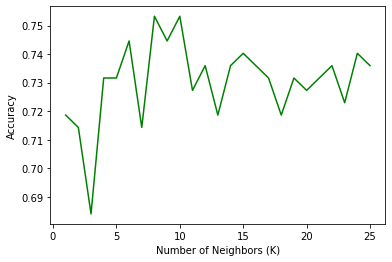

Maximum Accuracy Got is - 


,0
9,0.753247


In [126]:
plt.plot(range(1,n+1),accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

accuracy = pd.DataFrame(accuracy)
print("Maximum Accuracy Got is - " )
accuracy.sort_values(by = 0, ascending = False)[0:1]

In [127]:
clf_KNN = KNeighborsClassifier(n_neighbors = 24).fit(X_train, y_train)

In [128]:
#Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
clf2 = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)
y_test_pred_KNN = clf.predict(X_test)
print("Accuracy using criterion as gini - ", accuracy_score(y_test, y_test_pred_KNN))
clf3 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_test_pred_KNN = clf2.predict(X_test)
print("Accuracy using criterion as entropy - ", accuracy_score(y_test, y_test_pred_KNN))

Accuracy using criterion as gini -  0.7359307359307359
Accuracy using criterion as entropy -  0.658008658008658


In [131]:
clf_DT = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)

In [132]:
#SUPPORT VECTOR MACHINE

In [133]:
from sklearn.svm import SVC

In [134]:
clf4 = SVC(kernel = 'poly').fit(X_train, y_train)
print("accuracy using polynomial kernel - ", accuracy_score(y_test, clf2.predict(X_test)))
clf5 = SVC(kernel = 'rbf').fit(X_train, y_train)
print("accuracy using Radial Basis function kernel - ", accuracy_score(y_test, clf3.predict(X_test)))

accuracy using polynomial kernel -  0.658008658008658
accuracy using Radial Basis function kernel -  0.6493506493506493


In [135]:
clf_SVM = SVC(kernel = 'poly', random_state = 4).fit(X_train, y_train)

In [136]:
#LOGISTIC REGRESSION

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
clf_LR = LogisticRegression(solver='lbfgs', warm_start = True)
clf_LR.fit(X_train, y_train)
#print("accuracy score - ", accuracy_score(y_test, clf_LR.predict(X_test)))

LogisticRegression(warm_start=True)

In [139]:
#MODEL EVALUATION USING TEST SET

In [140]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [141]:
test_df = pd.read_csv('diabetes.csv')
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
# creating weekend column
test_df['age'] = test_df['Age']
test_df['late'] = test_df['age'].apply(lambda x: 1 if (x>10)  else 0)
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age,late
0,6,148,72,35,0,33.6,0.627,50,1,50,1
1,1,85,66,29,0,26.6,0.351,31,0,31,1
2,8,183,64,0,0,23.3,0.672,32,1,32,1
3,1,89,66,23,94,28.1,0.167,21,0,21,1
4,0,137,40,35,168,43.1,2.288,33,1,33,1


In [144]:
X_t = test_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
#X_t = pd.concat([X_t,pd.get_dummies(test_df['education'])], axis=1)
#X_t.drop(['Master or Above'], axis = 1,inplace=True)
X_t.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
0,6,148,72,35,0
1,1,85,66,29,0
2,8,183,64,0,0
3,1,89,66,23,94
4,0,137,40,35,168


In [145]:
X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)
X_t[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594]])

In [146]:
#test_df['Outcome'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [147]:
y_t = test_df['Outcome'].values
y_t[0:20]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [148]:
# np arrays to store intermediate result
Jaccard = np.full(4, np.nan)
F1_score = np.full(4, np.nan)
LogLoss = np.full(4, np.nan)
Algorithm = np.array(4)
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

In [149]:
Jaccard[0] = jaccard_score(y_t, clf_KNN.predict(X_t))
Jaccard[1] = jaccard_score(y_t, clf_DT.predict(X_t))
Jaccard[2] = jaccard_score(y_t, clf_SVM.predict(X_t))
Jaccard[3] = jaccard_score(y_t, clf_LR.predict(X_t))

In [150]:
F1_score[0] = f1_score(y_t, clf_KNN.predict(X_t))
F1_score[1] = f1_score(y_t, clf_DT.predict(X_t))
F1_score[2] = f1_score(y_t, clf_SVM.predict(X_t))
F1_score[3] = f1_score(y_t, clf_LR.predict(X_t))

In [151]:
LogLoss[3] = log_loss(y_t, clf_LR.predict_proba(X_t))

In [152]:
Report = pd.DataFrame({"Jaccard":Jaccard, "F1-score":F1_score, "LogLoss":LogLoss}, index=Algorithm)

In [153]:
Report

,Jaccard,F1-score,LogLoss
KNN,0.355769,0.524823,NaN
Decision Tree,0.698718,0.822642,NaN
SVM,0.358621,0.527919,NaN
LogisticRegression,0.413897,0.585470,0.509899
